# TP 1: SVM

$ \text{Dejonghe Rafael} \\
 \text{Reme Raphael}$

## Q1

In [42]:
import numpy as np
from sklearn.svm import SVC
from sklearn import datasets
from sklearn.model_selection import train_test_split
iris = datasets.load_iris()
X = iris.data
y = iris.target
X = X[y != 0, :2]
y = y[y != 0]

In [43]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.5)
svc = SVC(kernel = 'linear')
svc.fit(X_train, Y_train)
print("Success with a linear kernel :", svc.score(X_test, Y_test) * 100, "%")


Success with a linear kernel : 62.0 %


## Q2

In [44]:
svc = SVC(kernel ="poly", gamma = "scale")
svc.fit(X_train, Y_train)
print("Success with a polynomial kernel :", svc.score(X_test, Y_test) * 100, "%")

Success with a polynomial kernel : 62.0 %


In [45]:
n = 100

poly_scores = []
linear_scores = []
for i in range(n):
    X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.5)
    svc = SVC(kernel = "linear")
    svc.fit(X_train, Y_train)
    linear_scores.append(svc.score(X_test, Y_test))
    svc = SVC(kernel ="poly", gamma = "scale")
    svc.fit(X_train, Y_train)
    poly_scores.append(svc.score(X_test, Y_test))

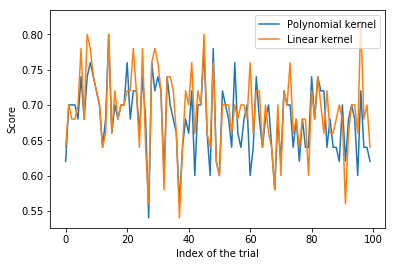

In [46]:
from matplotlib import pyplot as plt

plt.plot(range(n), poly_scores, label = "Polynomial kernel")
plt.plot(range(n), linear_scores, label = "Linear kernel")
plt.xlabel("Index of the trial")
plt.ylabel("Score")
plt.legend()
plt.show()

In [47]:
print("Mean score with polynomial kernel :",sum(poly_scores)/n)
print("Mean score with linear kernel :",sum(linear_scores)/n)

Mean score with polynomial kernel : 0.6798000000000001
Mean score with linear kernel : 0.6914


The linear kernel seems to perform slightly better than the polynomial one for this dataset.

## Q3

Soit $ w \in H, w_0 \in \mathbb{R}$

Soit $\Xi_i (w,w_0) = [\,[1-y_i(\Phi(x_i)^T w+ w_0)]_+\;; + \infty[$

Soit $\Xi (w,w_0) = \prod_{i=1}^{n} \Xi_i (w,w_0)$

Soit $\xi \in \Xi (w, w_0)$

On peut alors poser $f(w, w_0, \xi) = \frac{1}{2} \|w\|^2 + C\sum_{i=1}^{n} \xi_i.$ 

Le problème primal de la SVM s'écrit alors : $\underset{w \in H, w_0 \in \mathbb{R}, \xi \in \Xi(w, w_0)}{\min}f(w, w_0, \xi) = \underset{w \in H, w_0 \in \mathbb{R}}{\min} \underset{\xi \in \Xi(w, w_0)}{\min}f(w, w_0, \xi)$

(On rappelle que $\min_{a,b} f(a,b) = \min_a \min_b f(a,b) = \min_b \min_a f(a,b)$ )

Or $\forall i, f$ est une fonction croissante de $\xi_i$ (et pour tout $w, w_0, \xi_j (j\ne i)$  fixés).

Soit $\xi_{min} (w, w_0) = (\xi_{{min}_i})_i$ avec $\xi_{min_i}(w, w_0) = [1-y_i(\Phi(x_i)^T w+w_0)]_+$

On peut poser alors $g(w, w_0) = f(w, w_0, \xi_{min}(w, w_0))$. Et le résultat attentu de la question s'écrit : $\underset{w \in H, w_0\in \mathbb{R}}{\min} g(w,w_0)$




On a déjà clairement : $\min_\xi f(w,w_0,\xi) \le f(w,w_0,\xi_{min}) = g(w,w_0)$

Donc $\min_{w,w_0,\xi} f(w,w_0,\xi)\le \min_{w, w_0} g(w,w_0)$. on a obtenu une première inégalité.

De plus on a $\forall$ $w \in H$, $w_0 \in R$, $\xi \in \Xi (w,w_0)$, $f(w, w_0, \xi) \ge f(w, w_0, \xi_{min})$. (Parce que $f$ est croissante de $\xi_i \space \forall i$. Et que tout $\xi_i$ est plus grand que $\xi_{{min}_i}$ par construction de $\xi$)

Donc, $\min_{w,w_0,\xi} f(w,w_0,\xi) \ge min_{w,w_0,\xi} f(w, w_0, \xi_{min}) = \min_{w,w_0} g(w, w_0)$

On a donc la deuxième inégalité. Les deux problèmes sont équivalents.

On notera aussi que trouver $w^*$ et $w_0^*$ dans le second problème, c'est trouver $w^*$, $w_0^*$ et $\xi^*$ dans le premier et vice versa. (ils sont égaux. Et $\xi^* = \xi_{min}(w^*,w_0^*)$)

## Q4

On a donc le problème suivant :
$\underset{w \in H, w_0 \in \mathbb{R}}{\min} \frac{1}{2} \|w\|^2 + C\sum_{i=1}^{n} (1-y_i(\Phi(x_i)^T w+ w_0))_+ $
qui est équivalent à : $\underset{w \in H, w_0 \in \mathbb{R}}{\min} \sum_{i=1}^{n} (1-y_i(\Phi(x_i)^T w+ w_0))_+ + \frac{1}{2C} \|w\|^2 $

La marge pour l'échantillon i est $m = y_i(\Phi(x_i)^T w+ w_0)$. Et considerons $H(m) = (1-m)_+$. On a $\forall m \le 0,\,H(m) \ge 1$ et $\forall m \ge 0,\,H(m) \ge 0$. Donc $H(m)$ est un majorant de la fonction qui vaut 1 si la marge est négative, 0 sinon. De plus elle est convexe (Et même strictement convexe avec l'ajout de $\frac{1}{2} \|w\|^2$)

De plus on peut voir $(1-y_i(\Phi(x_i)^T w+ w_0))_+$ comme une erreur de prédiction. Donc on minimise bien l'erreur de prédiction avec une certaine pénalité ($\frac{1}{2C} \|w\|^2$).

## Q5

In [59]:
### DOWNLOAD DATASET ###
from sklearn.datasets import fetch_lfw_people


####################################################################
# Download the data (if not already on disk); load it as numpy arrays
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4,
                              color=True, funneled=False, slice_=None,
                              download_if_missing=True)

In [60]:
### EXTRACT FEATURES ###

from itertools import combinations
from random import choice

# introspect the images arrays to find the shapes (for plotting)
images = lfw_people.images / 255.
n_samples, h, w, n_colors = images.shape


# the label to predict is the id of the person
target_names = lfw_people.target_names.tolist()
####################################################################
# Pick a pair to classify such as
pairs = list(combinations(lfw_people.target_names, 2))
names = choice(pairs)

idx0 = (lfw_people.target == target_names.index(names[0]))
idx1 = (lfw_people.target == target_names.index(names[1]))
images = np.r_[images[idx0], images[idx1]]
n_samples = images.shape[0]
y = np.r_[np.zeros(np.sum(idx0)), np.ones(np.sum(idx1))].astype(np.int)

####################################################################
# Extract features
# features using only illuminations
X = (np.mean(images, axis=3)).reshape(n_samples, -1)
# Scale features
X -= np.mean(X, axis=0)
X /= np.std(X, axis=0)

print(X.shape, y.shape)

(766, 10000) (766,)


In [61]:
### CLASSIFY AND TEST ###

from time import time
import pylab as pl

####################################################################
# Split data into a half training and half test set
X_train, X_test, y_train, y_test, images_train, images_test = train_test_split(X, y, images, test_size=0.5, random_state=0)

####################################################################
# Quantitative evaluation of the model quality on the test set
print("Fitting the classifier to the training set")
t0 = time()
clf=SVC(kernel='linear')
clf.fit(X_train,y_train)

print("Done in %0.3fs" % (time() - t0))

print("Predicting the people names on the testing set")
t0 = time()
y_pred = clf.predict(X_test)
print("done in %0.3fs" % (time() - t0))

print("Chance level : %s" % max(np.mean(y), 1. - np.mean(y)))
print("Accuracy : %s" % clf.score(X_test, y_test))

Fitting the classifier to the training set
Done in 0.855s
Predicting the people names on the testing set
done in 0.799s
Chance level : 0.6919060052219321
Accuracy : 0.9399477806788512


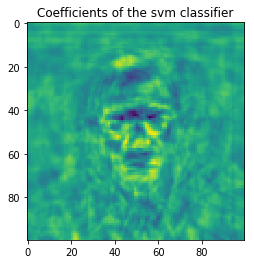

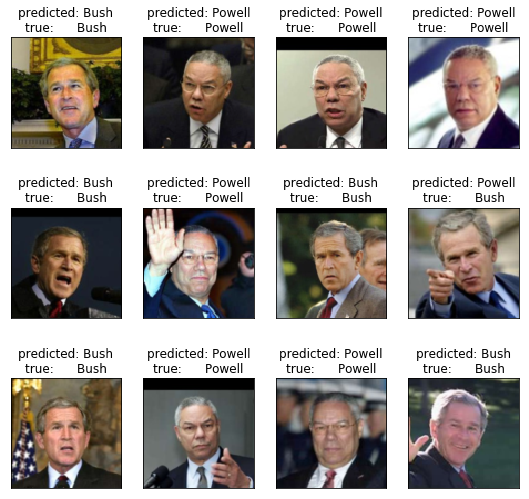

In [62]:
### PLOT SOME VISUAL RESULTS ###

####################################################################
# Look at the coefficients
pl.figure()
pl.imshow(np.reshape(clf.coef_, (h, w)))
pl.title("Coefficients of the svm classifier")

def plot_gallery(images, titles, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    pl.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    pl.subplots_adjust(bottom=0, left=.01, right=.99, top=.90,
                       hspace=.35)
    for i in range(n_row * n_col):
        pl.subplot(n_row, n_col, i + 1)
        pl.imshow(images[i])
        pl.title(titles[i], size=12)
        pl.xticks(())
        pl.yticks(())
        
def title(y_pred, y_test, names):
    pred_name = names[int(y_pred)].rsplit(' ', 1)[-1]
    true_name = names[int(y_test)].rsplit(' ', 1)[-1]
    return 'predicted: %s\ntrue:      %s' % (pred_name, true_name)


prediction_titles = [title(y_pred[i], y_test[i], names)
                     for i in range(y_pred.shape[0])]

plot_gallery(images_test, prediction_titles)
pl.show()

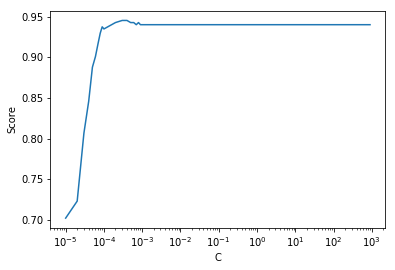

In [63]:
### Answer the question : 

Cs = [i * 10**j for j in range(-5,3) for i in range(1,10)]
scores = []

for c in Cs:
    clf=SVC(kernel='linear', C = c)
    clf.fit(X_train,y_train)
    scores.append(clf.score(X_test, y_test))

plt.plot(Cs, scores)
plt.xscale("log")
plt.ylabel("Score")
plt.xlabel("C")
plt.show()

$\xi$ représente l'erreur permise sur une expérience. Le paramètre C représente la force de la pénalisation de ces erreurs. Si C est tout petit, on permet de grandes erreurs, ce qui explique la chute des performances. En revanche avec un C grand, on ne permet aucune flexibilité. On veut absolument classifier correctement le maximum d'expérience du training_set. ($\xi_i = 0$ pour l'experience i) Notamment on est très peu résistant au bruit et il y a overfitting. On est moins bon sur le testing_set. Il y a un juste milieu à trouver qui ici se situe entre $10^{-4}$ et $10^{-3}$.

## Q6

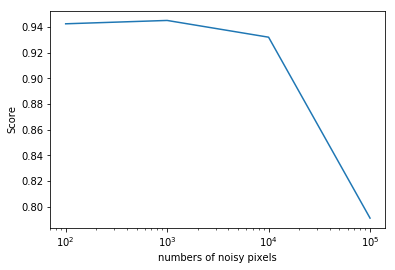

In [64]:
numbers_of_noises = [10 ** k for k in range(2,6)]
scores = []

for n in numbers_of_noises:
    X_train_gauss = np.hstack((X_train, np.random.normal(0,1,(X_train.shape[0], n))))
    X_test_gauss = np.hstack((X_test, np.random.normal(0,1, (X_test.shape[0], n))))
    clf=SVC(kernel='linear')
    clf.fit(X_train_gauss,y_train)
    scores.append(clf.score(X_test_gauss, y_test))
    
plt.plot(numbers_of_noises, scores)
plt.xscale("log")
plt.ylabel("Score")
plt.xlabel("numbers of noisy pixels")
plt.show()

## Q7

Cela permet de rendre comparable les variables et d'éviter un déséquilibre d'importance d'un pixel par rapport aux autres.

## Q8

In [65]:
from sklearn.decomposition import PCA

pca = PCA(0.9)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca=pca.transform(X_test)

In [66]:
X_train_pca.shape

(383, 100)

In [67]:
print("With rbf kernel :")
clf=SVC(kernel='rbf', gamma = 'scale')
clf.fit(X_train,y_train)
print("Score without PCA :", clf.score(X_test, y_test))
clf=SVC(kernel='rbf', gamma = 'scale')
clf.fit(X_train_pca,y_train)
print("Score with PCA :", clf.score(X_test_pca, y_test))

With rbf kernel :
Score without PCA : 0.8825065274151436
Score with PCA : 0.7023498694516971


On se rend compte qu'avec un noyau rbf, le score chute drastiquement.

## Q9

In [96]:
clf = SVC(kernel='linear')
clf.fit(X_train, y_train)

coef = clf.coef_[0]
dual_coef = clf.dual_coef_[0]
intercept = clf.intercept_
support_vectors = X_train[clf.support_]

W_dual = np.dot(support_vectors.T, dual_coef)

In [109]:
def f(w, w0, C):
    S = 1/2 * np.dot(w.T, w) 
    S += C * np.sum(np.maximum(np.zeros(y_train.shape), 1 - np.dot(np.diag(y_train), np.dot(X_train, w) + w0)))
    return S

In [117]:
d = f(coef, intercept, C = 1)
p = f(W_dual, intercept, C = 1)
diff = p-d

print('La  différence vaut: '+str(diff))

La  différence vaut: 0.0


## Q10

In [113]:
tols = [i * 10**j for j in range(-5,5) for i in range(1,10)]

diffs = []
ds = []
ps = []

for tol in tols:
    clf = SVC(kernel='linear', tol = tol) # Semble ne pas fonctionner comme je le souhaite
    clf.fit(X_train, y_train)

    coef = clf.coef_[0]
    dual_coef = clf.dual_coef_[0]
    intercept = clf.intercept_
    support_vectors = X_train[clf.support_]

    W_dual = np.dot(support_vectors.T, dual_coef)
    d = f(W_dual, intercept, C = 1)
    p = f(coef, intercept, C = 1)
    diffs.append(abs(p-d))
    ps.append(p)
    ds.append(d)

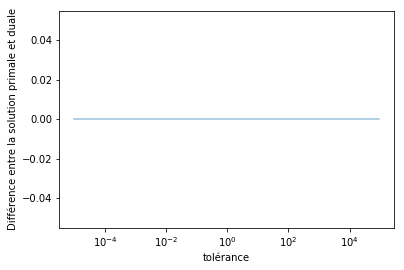

In [114]:
plt.plot(tols, diffs, alpha = 0.45)

plt.xscale('log')
plt.xlabel('tolérance')
plt.ylabel('Différence entre la solution primale et duale')
plt.show()